# Sales 

## Import packages

In [68]:
# importing packages
import pandas as pd
import numpy as np
import utils
print("All packages imported successfully!")

All packages imported successfully!


## Import and inspect data

In [69]:
# Dataframe from csv file
df = pd.read_csv("AusApparalSales4thQrt2020.csv", parse_dates=['Date'], index_col=['Date'])

# pd.options.display.float_format = '{:,.2f}'.format
# df.style.format("{.2f")

print(f"df.head()\n {df.head()} \n")
print(f"df.tail() \n {df.tail()}")

df.head()
                   Time State     Group  Unit  Sales
Date                                               
2020-10-01     Morning    WA      Kids     8  20000
2020-10-01     Morning    WA       Men     8  20000
2020-10-01     Morning    WA     Women     4  10000
2020-10-01     Morning    WA   Seniors    15  37500
2020-10-01   Afternoon    WA      Kids     3   7500 

df.tail() 
                   Time State     Group  Unit  Sales
Date                                               
2020-12-30   Afternoon   TAS   Seniors    14  35000
2020-12-30     Evening   TAS      Kids    15  37500
2020-12-30     Evening   TAS       Men    15  37500
2020-12-30     Evening   TAS     Women    11  27500
2020-12-30     Evening   TAS   Seniors    13  32500


In [70]:
# df.describe()
print("Before optimizing")
print(f"size: {df.size}\n")
print(f"memory_usage: \n{df.memory_usage(deep=True)} \n")
print(f"{df.dtypes}")

Before optimizing
size: 37800

memory_usage: 
Index     60480
Time     496440
State    457920
Group    474390
Unit      60480
Sales     60480
dtype: int64 

Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object


In [71]:
# Optimize memory
# Convert object type to str, Date to datetime and reduce int.
df.reset_index(inplace=True)
cols = df.select_dtypes(np.object_).columns[1:]  # every object type except Date
df[cols] = df[cols].astype("string")
df["Date"] = pd.to_datetime(df["Date"])
df["Unit"] = df["Unit"].astype("int8")
df["Sales"] = df["Sales"].astype("int32")

In [72]:
print("After optimizing")
print(f"size: {df.size}\n")
print(f"memory_usage: \n{df.memory_usage(deep=True)}\n")
print(f"{df.dtypes}")

After optimizing
size: 45360

memory_usage: 
Index       128
Date      60480
Time     496440
State    457920
Group    474390
Unit       7560
Sales     30240
dtype: int64

Date     datetime64[ns]
Time             object
State    string[python]
Group    string[python]
Unit               int8
Sales             int32
dtype: object


#### Observations

We can see that memory usage reduced at least in `Date`, `Unit`, and `Sales`. It wasn't the case for Time, State, and Group. 

In [73]:
# Changing Time, State, Group back to object
df[cols] = df[cols].astype(object)
print("After changing back")
print(f"size: {df.size}\n")
print(f"memory_usage: \n{df.memory_usage(deep=True)}\n")
print(f"{df.dtypes}")

After changing back
size: 45360

memory_usage: 
Index       128
Date      60480
Time     496440
State    457920
Group    474390
Unit       7560
Sales     30240
dtype: int64

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit               int8
Sales             int32
dtype: object


In [74]:
dimensions = df.shape
print(
    f"Dimensions {dimensions} Data contains {dimensions[0]} rows and {dimensions[1]} columns"
)
print(f"Columns are {list(df.columns)}")

Dimensions (7560, 6) Data contains 7560 rows and 6 columns
Columns are ['Date', 'Time', 'State', 'Group', 'Unit', 'Sales']


### Data wrangling

a. Ensure that the data is clean and free from any missing or incorrect entries.

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int8          
 5   Sales   7560 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int8(1), object(3)
memory usage: 273.3+ KB


In [76]:
# Find rows with at least one NA value
df[df.isna().any(axis=1)]

# Find rows where all values are empty
# df[df.isna().all(axis=1)]

,Date,Time,State,Group,Unit,Sales


In [77]:
# Find columns with at least one empty value
df.columns[df.isna().any()]

# Find columns where all values are empty
# df.columns[df.isna().all()]

Index([], dtype='object')

In [78]:
# Checking for null in any of the columns
# df.isna().sum()
df.notna().sum()

Date     7560
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64

#### Observations

In the result, we can see that the data does not have null values:

- `df.info()` is telling us that 7560 records are non-null, and with `df.shape` we confirmed that there are 7560 rows.
- `df.isna().sum()`returns 0 for each column
- `df.notnat().sum()` returns 7560 for each columns, which tells me that there are not NaN

However, `isna()` or `df.notna()` doesn't seen to check for missing values (spaces, empty string)

So I added NaN and empty string to the dataframe to make sure I check for empty string as well as NaN values.  


In [79]:
from datetime import datetime
import locale

# Note:
# I was getting "time data '29-Dec-2020' does not match format '%d-%b-%Y'""
# The %b directive in the strptime method is locale-dependent so I set it to EN-US

# Set the locale to English
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

# 20-Dec-2020,'Afternoon', '', Seniors, 13, 32500
# 30-Dec-2020','Evening', 'TAS',None,12, 33500
# 31-Dec-2020',np.nan, 'TAS','Kids',12, 3350

# Add 3 rows with empty values, None and NaN to the dataframe
df2 = df.copy()
df2.loc[len(df2.index)] = [
    datetime.strptime("29-Dec-2020", "%d-%b-%Y"),
    "Afternoon",
    "",
    "Seniors",
    12,
    32500,
]  # empty value in State
df2.loc[len(df2.index)] = [
    datetime.strptime("30-Dec-2020", "%d-%b-%Y"),
    "Evening",
    "TAS",
    None,
    12,
    33500,
]  # None value in Group
df2.loc[len(df2.index)] = [
    datetime.strptime("31-Dec-2020", "%d-%b-%Y"),
    np.nan,
    "TAS",
    "Kids",
    12,
    33500,
]  # Nan value in Time
df2.tail()

,Date,Time,State,Group,Unit,Sales
7558,2020-12-30,Evening,TAS,Women,11,27500
7559,2020-12-30,Evening,TAS,Seniors,13,32500
7560,2020-12-29,Afternoon,,Seniors,12,32500
7561,2020-12-30,Evening,TAS,None,12,33500
7562,2020-12-31,NaN,TAS,Kids,12,33500


In [80]:
print(f"Before optimization copy of dataset (df2)")
print(f"df2.dtypes: \n{df2.dtypes}\n")
print(f"memory_usage: \n{df2.memory_usage(deep=True)}\n")

# Optimize df2 too 
df2["Unit"] = df2["Unit"].astype("int8")
df2["Sales"] = df2["Sales"].astype("int32")

print(f"After optimization")
print(f"df2.dtypes: \n{df2.dtypes}\n")
print(f"memory_usage: \n{df2.memory_usage(deep=True)}\n")

# df2.select_dtypes(np.object_).columns

Before optimization copy of dataset (df2)
df2.dtypes: 
Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

memory_usage: 
Index     60504
Date      60504
Time     496602
State    458097
Group    474539
Unit      60504
Sales     60504
dtype: int64

After optimization
df2.dtypes: 
Date     datetime64[ns]
Time             object
State            object
Group            object
Unit               int8
Sales             int32
dtype: object

memory_usage: 
Index     60504
Date      60504
Time     496602
State    458097
Group    474539
Unit       7563
Sales     30252
dtype: int64



In [81]:
# Checking for null with numpy
print(
    f"Using numPy isnull(), it only detects None and NaN \nSo running 'np.where(pd.isnull(df2)' returns: {np.where(pd.isnull(df2))}"
)
print(
    "Indicating that in row 7561 column 3 there is a None value,  and in row 7562 column 3 there is a NaN value  \n"
)

print(
    f"Same as isna(), it only detects None and NaN\n So running, 'df2[df2.isna().any(axis=1)])': \n{df2[df2.isna().any(axis=1)]} \n"
)

print(
    f"In conclusion, we need to check for '' (empty) values as well df2[df2.map(lambda x: x == '').any(axis=1)]\n"
)
print(f"{df2[df2.map(lambda x: x == '').any(axis=1)]} \n")
print(f"And we combine checking for NaN and '' empty values to ")

# Using isna()
# df2[df2.isna().any(axis=1) | df2.map(lambda x: x == '').any(axis=1)]

# Using isnull
df2[df2.isnull().any(axis=1) | (df2 == "").any(axis=1)]

Using numPy isnull(), it only detects None and NaN 
So running 'np.where(pd.isnull(df2)' returns: (array([7561, 7562]), array([3, 1]))
Indicating that in row 7561 column 3 there is a None value,  and in row 7562 column 3 there is a NaN value  

Same as isna(), it only detects None and NaN
 So running, 'df2[df2.isna().any(axis=1)])': 
           Date     Time State Group  Unit  Sales
7561 2020-12-30  Evening   TAS  None    12  33500
7562 2020-12-31      NaN   TAS  Kids    12  33500 

In conclusion, we need to check for '' (empty) values as well df2[df2.map(lambda x: x == '').any(axis=1)]

           Date       Time State    Group  Unit  Sales
7560 2020-12-29  Afternoon        Seniors    12  32500 

And we combine checking for NaN and '' empty values to 


,Date,Time,State,Group,Unit,Sales
7560,2020-12-29,Afternoon,,Seniors,12,32500
7561,2020-12-30,Evening,TAS,None,12,33500
7562,2020-12-31,NaN,TAS,Kids,12,33500


In [82]:
# To check for the columns
# cols_with_empty = df2.apply(lambda col: col.apply(lambda x: x.strip() == '' if isinstance(x, str) else False).any())
# print(cols_with_empty[cols_with_empty].index.tolist())
df2.columns[df2.isnull().any() | (df2 == "").any()]

Index(['Time', 'State', 'Group'], dtype='object')

#### Observations

Using numpy we can see:

- `np.where(pd.isnull(df))` returns the row and column indices where the value is NaN. We get empty arrays as a result
- `np.where(df.map(lambda x: x == ''))` also returns empty arrays. 

Note that using `map` requires calling a Python function once for each cell of the DataFrame. That could be slow for a large DataFrame, so it would be better 
to arrange for all the blank cells to contain NaN instead, and then use `pd.isnull()`


b. Based on your knowledge of Data Analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).

#### Recomendations

There are a couple things we could do. 
- Per above comment, for all the blank cells I will fill with NaN 

In [83]:
# Replace with NaN and then find those rows.
df = df.replace(" ", np.nan)
nan_values = df[df.isna().any(axis=1)]
nan_values

nan_rows = df.loc[df.isna().any(axis=1)]
nan_rows

,Date,Time,State,Group,Unit,Sales


In [84]:
# I will use df2 to make my recommendation in the case of missing/incorrect data

# 1. First replace '' with NaN

# df2.replace('None', np.nan, inplace=True) and find them
df2 = df2.replace("", np.nan)

# Find Options
# a. Using `df.loc``
# nan_rows  = df2.loc[df2.isna().any(axis=1)]

# b. finding all `isnull()` rows first
# null_mask = df2.isnull().any(axis=1)
# null_rows = df2[null_mask]
# null_rows

# c. or directly finding all `isna()`` rows
nan_rows = df2[df2.isna().any(axis=1)]
nan_rows

,Date,Time,State,Group,Unit,Sales
7560,2020-12-29,Afternoon,NaN,Seniors,12,32500
7561,2020-12-30,Evening,TAS,None,12,33500
7562,2020-12-31,NaN,TAS,Kids,12,33500


In [85]:
# 2. Then, make sure that each value is unique, so we can groupby later.
categorical = ["Time", "State", "Group"]
df2_categorical = df2[categorical]

# a. describe() will give you the unique info
df2_categorical.describe()

,Time,State,Group
count,7562,7562,7562
unique,5,8,6
top,Morning,WA,Kids
freq,2520,1080,1890


In [86]:
# b. Or inspecting with `nunique()` and `unique()`
if df2.Time.nunique() != len(df2.Time.unique()):
    print(f"Time values {df2.Time.unique()} - {df2.Time.nunique()}")

if df2.State.nunique() != len(df2.State.unique()):
    print(f"State values {df2.State.unique()} - {df2.State.nunique()}")

if df2.Group.nunique() != len(df2.Group.unique()):
    print(f"Group values {df2.Group.unique()} - {df2.Group.nunique()}")

Time values [' Morning' ' Afternoon' ' Evening' 'Afternoon' 'Evening' nan] - 5
State values [' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS' nan 'TAS'] - 8
Group values [' Kids' ' Men' ' Women' ' Seniors' 'Seniors' None 'Kids'] - 6


#### Observations
We can see that some categorical values has spaces, whic
- For Time, ' Evening' and 'Evening'  
- For State, ' TAS' isn't the same as 'TAS'
- For Group, ' Kids'and 'Kids'. ' Seniors' vs 'Seniors'

In [87]:
# c. with value_counts() we can also see that something isn't quite right. (What are the possible values that belogn to this category)
for colName in list(df2_categorical):
    print(f"{colName} counts: \n {df2[colName].value_counts()} \n")

Time counts: 
 Time
 Morning      2520
 Afternoon    2520
 Evening      2520
Afternoon        1
Evening          1
Name: count, dtype: int64 

State counts: 
 State
 WA     1080
 NT     1080
 SA     1080
 VIC    1080
 QLD    1080
 NSW    1080
 TAS    1080
TAS        2
Name: count, dtype: int64 

Group counts: 
 Group
 Kids       1890
 Men        1890
 Women      1890
 Seniors    1890
Seniors        1
Kids           1
Name: count, dtype: int64 



In [88]:
# Checking the rows added manually with NAN 
times = df2.loc[7560: 7564]['Time']
states = df2.loc[7560: 7564]['State']
group = df2.loc[7560: 7564]['Group']

print(times)
print(states)
print(group)

7560    Afternoon
7561      Evening
7562          NaN
Name: Time, dtype: object
7560    NaN
7561    TAS
7562    TAS
Name: State, dtype: object
7560    Seniors
7561       None
7562       Kids
Name: Group, dtype: object


In [89]:
# 3. Remove spaces to then groupby unique values
# ====================
# Not sure why this isn't working
# for colName in list(df2_categorical):
#     df[colName] = df[colName].apply(lambda x: x.strip())
#     print(f"{colName} values: {df2[colName].unique()} - {df2[colName].nunique()}")
print("\nDescribe df2 before removing spaces")
df2[categorical].describe() 

df2["Time"] = df2["Time"].str.strip()
df2["State"] = df2["State"].str.strip()
df2["Group"] = df2["Group"].str.strip()

print(f"Time values {df2.Time.unique()} - {df2.Time.nunique()}")
print(f"State values {df2.State.unique()} - {df2.State.nunique()}")
print(f"Group values {df2.Group.unique()} - {df2.Group.nunique()}")
print("\nDescribe df2 after removing spaces")
df2[categorical].describe() 



Describe df2 before removing spaces
Time values ['Morning' 'Afternoon' 'Evening' nan] - 3
State values ['WA' 'NT' 'SA' 'VIC' 'QLD' 'NSW' 'TAS' nan] - 7
Group values ['Kids' 'Men' 'Women' 'Seniors' None] - 4

Describe df2 after removing spaces


,Time,State,Group
count,7562,7562,7562
unique,3,7,4
top,Afternoon,TAS,Kids
freq,2521,1082,1891


In [90]:
# Apply the same to the original df
df["Time"] = df["Time"].str.strip()
df["State"] = df["State"].str.strip()
df["Group"] = df["Group"].str.strip()
print("\nDescribe df after removing spaces")
df[categorical].describe() 


Describe df after removing spaces


,Time,State,Group
count,7560,7560,7560
unique,3,7,4
top,Morning,WA,Kids
freq,2520,1080,1890


In [91]:
# 4. In this case I decided to dropna() but you could also fillin with mode() sample because we only have 3 rows (added) with NaN

# time_value =list(df2['Time'].mode().sample())[0]
# df2.fillna({'Time': time_value }, inplace=True)

# group_value =list(df2['Group'].mode().sample())[0]
# df2.fillna({'Group': group_value }, inplace=True)

# state_value =list(df2['State'].mode().sample())[0]
# df2.fillna({'State': group_value }, inplace=True)
df2 = df2.dropna
df = df.dropna()

c. Choose a suitable Data Wrangling technique——either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)


##### Data binning: Standardization

The data is very consistent, so Standardization isn't neccessary. I will be doing it just for practicing. 

Moving on I will be focused with Normalization technique by using `groupby`

In [92]:
# Data binning: Standardization
from scipy.stats import zscore

df['zcore-sales'] = zscore(df['Sales'])

threshold = 2
df['outliers'] = np.where((df['zcore-sales'] - threshold > 0), True, np.where(df['zcore-sales'] + threshold < 0, True, False))

df.head()
# df.tail()

,Date,Time,State,Group,Unit,Sales,zcore-sales,outliers
0,2020-10-01,Morning,WA,Kids,8,20000,-0.775581,False
1,2020-10-01,Morning,WA,Men,8,20000,-0.775581,False
2,2020-10-01,Morning,WA,Women,4,10000,-1.085645,False
3,2020-10-01,Morning,WA,Seniors,15,37500,-0.232969,False
4,2020-10-01,Afternoon,WA,Kids,3,7500,-1.163162,False


In [93]:
# Even though it doesn't make sense to find outliers with total sales, just to practice.
df.drop((df[df['outliers']==True]).index, inplace=True)

In [94]:
if 'zcore-sales'in list(df.columns) or 'outliers'in list(df.columns):
    df = df.drop(columns=['zcore-sales', 'outliers'])
df.head(n=1)

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000


#### Observations

##### Data binnning: Normalization
I will use groupby() since we only have one dataset to split my data into categories

In [95]:
# Copy before adding period columns
orig_df = df.copy()

print(f"Indexes: {df.index.names}")
if 'Date'in df.index.names:
    df.reset_index(inplace=True)

# Add column to group by month & year

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
df.head()
# df.tail()

Indexes: [None]


,Date,Time,State,Group,Unit,Sales,YearMonth
0,2020-10-01,Morning,WA,Kids,8,20000,2020-10
1,2020-10-01,Morning,WA,Men,8,20000,2020-10
2,2020-10-01,Morning,WA,Women,4,10000,2020-10
3,2020-10-01,Morning,WA,Seniors,15,37500,2020-10
4,2020-10-01,Afternoon,WA,Kids,3,7500,2020-10


In [96]:
# Group by YearMonth
print("Group by Year & Month")
cat_month_year = df.groupby(['YearMonth'])
cat_month_year.Sales.sum().reset_index()

Group by Year & Month


,YearMonth,Sales
0,2020-10,103917500
1,2020-11,87355000
2,2020-12,102837500


In [97]:
# Group by categoricals
cat_time = df.groupby("Time")
cat_group = df.groupby("Group")
cat_state = df.groupby("State")

print(f"Time Categories : {list(cat_time.groups.keys())}")

print(f"Group Categories : {list(cat_group.groups.keys())}")

print(f"State Categories : {list(cat_state.groups.keys())}")


Time Categories : ['Afternoon', 'Evening', 'Morning']
Group Categories : ['Kids', 'Men', 'Seniors', 'Women']
State Categories : ['NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA']


#### Observations
- Here we can see that we only have three months: Oct, Nov & Dec. 
- We observe that October has more sales compared to Nov and Dec.
- We have three Time categories: 'Afternoon', 'Evening', 'Morning'
- Data is grouped by 'Kids', 'Men', 'Seniors', 'Women'
- States are 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA'

### Data analysis

a. Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

In [98]:
print(f"Sales.describe():\n{df.Sales.describe()}\n")

locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
#format currency value
print(f"Total Sales: {locale.currency(df['Sales'].sum(), grouping=True)}\n")
print(f"Total Sales mean: {'${:,.2f}'.format(df['Sales'].mean())}")


Sales.describe():
count      7200.000000
mean      40848.611111
std       26718.514350
min        5000.000000
25%       20000.000000
50%       32500.000000
75%       60000.000000
max      107500.000000
Name: Sales, dtype: float64

Total Sales: $294,110,000.00

Total Sales mean: $40,848.61


In [99]:
# Group by YearMonth
cat_month_year = df.groupby(['YearMonth'])
sales_by_month_year = cat_month_year['Sales'].sum().reset_index()
sales_by_month_year['Sales'] = sales_by_month_year['Sales'].apply(lambda x: locale.currency(x,grouping=True))
print(f"Total Sales per month: \n{sales_by_month_year}\n")
print(f"Avg per month: \n {cat_month_year['Sales'].mean()}")

Total Sales per month: 
  YearMonth            Sales
0   2020-10  $103,917,500.00
1   2020-11   $87,355,000.00
2   2020-12  $102,837,500.00

Avg per month: 
 YearMonth
2020-10    42729.235197
2020-11    35082.329317
2020-12    45143.766462
Freq: M, Name: Sales, dtype: float64


In [100]:
# df.groupby(['Group', 'Sales']).value_counts()

#### Observations

- October's sales were the highest, even though in avg is lower than Dec. 
- Max sale was for $107,500.00
- Min sale was $5,000
- Avg sale overall is $40,848.61

In [101]:
# Based on each category
cat_group = df.groupby("Group")

sales_by_group = cat_group['Sales'].sum().sort_values().reset_index(name='Sales')
sales_by_group['Sales'] = sales_by_group['Sales'].apply(lambda x: locale.currency(x,grouping=True))
print(f"Total Sales by Group: \n{sales_by_group}\n")

cat_group['Sales'].describe()

Total Sales by Group: 
     Group           Sales
0  Seniors  $72,152,500.00
1     Kids  $73,360,000.00
2    Women  $74,177,500.00
3      Men  $74,420,000.00



,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Kids,1797.0,40823.594880,26444.815630,5000.0,20000.0,32500.0,60000.0,107500.0
Men,1802.0,41298.557159,26784.960976,5000.0,20000.0,32500.0,60000.0,107500.0
Seniors,1798.0,40129.310345,26209.885324,5000.0,20000.0,32500.0,57500.0,107500.0
Women,1803.0,41141.153633,27423.673984,5000.0,20000.0,32500.0,61250.0,107500.0


In [102]:
cat_group['Sales'].value_counts().unstack()

Sales,5000,7500,10000,12500,15000,17500,20000,22500,25000,27500,...,85000,87500,90000,92500,95000,97500,100000,102500,105000,107500
Group,,,,,,,,,,,,,,,,,,,,,
Kids,22,56,52,91,89,89,87,97,101,90,...,25,21,16,15,13,13,22,15,12,13
Men,33,45,62,71,105,89,88,87,102,70,...,24,33,19,18,9,26,17,17,12,11
Seniors,42,64,41,91,76,98,94,119,105,67,...,21,27,21,18,13,20,17,12,9,6
Women,33,75,55,78,100,86,100,103,94,67,...,45,26,21,18,15,16,18,13,16,14


#### Observations

- Overall, sales to men are slightly higher than those to women.
- Sales to seniors are the lowest, following Kid's 
- We can see the average per group. We see that Men's avg matches with Men's sales.

In [103]:
# Based on each category
cat_time = df.groupby("Time")
sales_by_time = cat_time['Sales'].sum().sort_values().reset_index(name='Sales')
sales_by_time['Sales'] = sales_by_time['Sales'].apply(lambda x: locale.currency(x,grouping=True))
print(f"Total Sales by Time: \n{sales_by_time}\n")

cat_time['Sales'].describe()


Total Sales by Time: 
        Time           Sales
0    Evening  $97,527,500.00
1    Morning  $97,970,000.00
2  Afternoon  $98,612,500.00



,count,mean,std,min,25%,50%,75%,max
Time,,,,,,,,
Afternoon,2401.0,41071.428571,26711.323286,5000.0,20000.0,32500.0,60000.0,107500.0
Evening,2407.0,40518.280017,26729.045876,5000.0,20000.0,32500.0,57500.0,107500.0
Morning,2392.0,40957.357860,26723.096013,5000.0,20000.0,32500.0,60000.0,107500.0


In [104]:
cat_time['Sales'].value_counts().unstack()

Sales,5000,7500,10000,12500,15000,17500,20000,22500,25000,27500,...,85000,87500,90000,92500,95000,97500,100000,102500,105000,107500
Time,,,,,,,,,,,,,,,,,,,,,
Afternoon,44,84,71,108,132,119,109,130,142,90,...,41,31,30,18,21,29,17,16,18,13
Evening,35,74,71,117,127,124,137,154,140,99,...,49,33,24,26,13,23,33,19,14,16
Morning,51,82,68,106,111,119,123,122,120,105,...,25,43,23,25,16,23,24,22,17,15


In [105]:
# Based on each category
cat_state = df.groupby("State")
sales_by_state = cat_state['Sales'].sum().sort_values().reset_index(name='Sales')
sales_by_state['Sales'] = sales_by_state['Sales'].apply(lambda x: locale.currency(x,grouping=True))
print(f"Total Sales by State: \n{sales_by_state}\n")

cat_state['Sales'].describe()


Total Sales by State: 
  State           Sales
0    WA  $22,152,500.00
1    NT  $22,580,000.00
2   TAS  $22,760,000.00
3   QLD  $33,417,500.00
4    SA  $58,857,500.00
5   VIC  $62,040,000.00
6   NSW  $72,302,500.00



,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
NSW,1056.0,68468.276515,19864.259440,30000.0,52500.0,70000.0,85000.0,107500.0
NT,1080.0,20907.407407,8961.907893,5000.0,15000.0,20000.0,27500.0,37500.0
QLD,1080.0,30942.129630,13344.638002,7500.0,20000.0,30000.0,40000.0,62500.0
SA,1080.0,54497.685185,17460.965183,25000.0,40000.0,52500.0,67500.0,87500.0
TAS,1080.0,21074.074074,9024.684205,5000.0,15000.0,20000.0,27500.0,37500.0
VIC,744.0,83387.096774,15469.416540,50000.0,72500.0,85000.0,97500.0,107500.0
WA,1080.0,20511.574074,9231.905897,5000.0,12500.0,20000.0,27500.0,37500.0


#### Observations

- We can see that sales happen more in the afternoon (98,612,500) than in the morning and evening.
- Even though the amount in $$$ is higher in the afternoon, counts are slightly higher in the evening.  
- The NSW state has the highest sale ($72,302,500) even though counts are slightly lower, and 
- The WA State has the lowest sale ($22,152,500)

In [106]:
print(f"Unit.describe():\n{df.Unit.describe()}\n")
print(f"Total unit: {'{:,}'.format(df['Unit'].sum())}\n")
print(f"Total units per month: \n{cat_month_year['Unit'].sum().sort_values().reset_index(name='Unit')}\n")
# # Based on each category
print(f"By Group:\n {cat_group.Unit.agg(['mean', 'sum']).reset_index()}\n")
print(f"By Time:\n {cat_time.Unit.agg(['mean', 'sum'])}\n")
print(f"By State:\n {cat_state.Unit.agg(['mean', 'sum'])}\n")

print(f"Unit median: {df['Unit'].median()}")
print(f"Unit mean: {'{:,.2f}'.format(df['Unit'].mean())}")

Unit.describe():
count    7200.000000
mean       16.339444
std        10.687406
min         2.000000
25%         8.000000
50%        13.000000
75%        24.000000
max        43.000000
Name: Unit, dtype: float64

Total unit: 117,644

Total units per month: 
  YearMonth   Unit
0   2020-11  34942
1   2020-12  41135
2   2020-10  41567

By Group:
      Group       mean    sum
0     Kids  16.329438  29344
1      Men  16.519423  29768
2  Seniors  16.051724  28861
3    Women  16.456461  29671

By Time:
                 mean    sum
Time                       
Afternoon  16.428571  39445
Evening    16.207312  39011
Morning    16.382943  39188

By State:
             mean    sum
State                  
NSW    27.387311  28921
NT      8.362963   9032
QLD    12.376852  13367
SA     21.799074  23543
TAS     8.429630   9104
VIC    33.354839  24816
WA      8.204630   8861

Unit median: 13.0
Unit mean: 16.34


#### Observations

- Total units in Oct match sales as the highest. 
- Same, Men's units match sales by group
- Unit in the afternoon is the highest

b. Identify the group with the highest sales and the group with the lowest sales based on the data provided.

c. Identify the group within the highest and lowest sales based on the data provided.


In [107]:
cat_group.Sales.sum().nlargest(5)

Group
Men        74420000
Women      74177500
Kids       73360000
Seniors    72152500
Name: Sales, dtype: int32

#### Observations
- The group with the highest sales is Men.
- The group with the lowest sales is Seniors.
- The groups within the highest and lowest sales are Women and Kids.

d. Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted.

In [108]:
# Create a new columns 'YearQuarter' and 'YearWeek' to hold the year, quarter and week number for each date
df['YearWeek'] = df['Date'].dt.strftime('%Y-%U')
df['YearQuarter'] = df['Date'].dt.to_period('Q')

In [109]:
df.head()

,Date,Time,State,Group,Unit,Sales,YearMonth,YearWeek,YearQuarter
0,2020-10-01,Morning,WA,Kids,8,20000,2020-10,2020-39,2020Q4
1,2020-10-01,Morning,WA,Men,8,20000,2020-10,2020-39,2020Q4
2,2020-10-01,Morning,WA,Women,4,10000,2020-10,2020-39,2020Q4
3,2020-10-01,Morning,WA,Seniors,15,37500,2020-10,2020-39,2020Q4
4,2020-10-01,Afternoon,WA,Kids,3,7500,2020-10,2020-39,2020Q4


In [110]:
# Group by year & week
df.groupby(['YearWeek']).Sales.describe()

,count,mean,std,min,25%,50%,75%,max
YearWeek,,,,,,,,
2020-39,242.0,41900.826446,26976.870363,7500.0,20000.0,32500.0,62500.0,107500.0
2020-40,569.0,43273.286467,27041.545174,7500.0,22500.0,35000.0,65000.0,107500.0
2020-41,563.0,42446.714032,26268.050951,7500.0,22500.0,35000.0,62500.0,107500.0
2020-42,572.0,43216.783217,27323.502033,7500.0,22500.0,35000.0,65000.0,107500.0
2020-43,486.0,42258.230453,27200.206264,7500.0,20000.0,32500.0,65000.0,107500.0
2020-44,582.0,34377.147766,25590.881756,5000.0,15000.0,25000.0,52500.0,107500.0
2020-45,579.0,34995.682211,26136.990691,5000.0,15000.0,25000.0,52500.0,107500.0
2020-46,581.0,35443.201377,26633.435223,5000.0,15000.0,25000.0,52500.0,107500.0
2020-47,583.0,35257.289880,26391.234569,5000.0,15000.0,25000.0,51250.0,107500.0


In [149]:
print(f"Weekly mean:")
df.groupby(['YearWeek']).Sales.mean().apply(lambda x: locale.currency(x,grouping=True))

Weekly mean:


YearWeek
2020-39    $41,900.83
2020-40    $43,273.29
2020-41    $42,446.71
2020-42    $43,216.78
2020-43    $42,258.23
2020-44    $34,377.15
2020-45    $34,995.68
2020-46    $35,443.20
2020-47    $35,257.29
2020-48    $42,587.00
2020-49    $44,385.55
2020-50    $45,723.68
2020-51    $44,403.41
2020-52    $46,365.13
Name: Sales, dtype: object

In [150]:
# Group by Q
# print(f"Quarterly: {df.groupby('YearQuarter').Sales.describe()}")
print(f"Quarterly mean: \n{df.groupby('YearQuarter').Sales.mean().apply(lambda x: locale.currency(x,grouping=True))}\n")
print(f"Quarterly sum: \n{df.groupby('YearQuarter').Sales.sum().apply(lambda x: locale.currency(x,grouping=True))}")
df.groupby('YearQuarter').Sales.describe()


Quarterly mean: 
YearQuarter
2020Q4    $40,848.61
Freq: Q-DEC, Name: Sales, dtype: object

Quarterly sum: 
YearQuarter
2020Q4    $294,110,000.00
Freq: Q-DEC, Name: Sales, dtype: object


,count,mean,std,min,25%,50%,75%,max
YearQuarter,,,,,,,,
2020Q4,7200.0,40848.611111,26718.51435,5000.0,20000.0,32500.0,60000.0,107500.0


In [151]:
# Group by month & year

# df.groupby('YearQuarter').value_counts()
df.groupby('YearMonth').Sales.mean()
# print(f"Monthly: {df.groupby('YearMonth').Sales.describe()}\n")
df.groupby('YearMonth').Sales.sum().apply(lambda x: locale.currency(x,grouping=True))

YearMonth
2020-10    $103,917,500.00
2020-11     $87,355,000.00
2020-12    $102,837,500.00
Freq: M, Name: Sales, dtype: object

In [152]:
df['YearWeek'] = df['Date'].dt.strftime('%Y-%U')
df.groupby(['YearWeek', 'Sales']).Unit.count()
# print(f"Total units per month: \n{cat_month_year['Unit'].sum().sort_values().reset_index(name='Unit')}\n")

YearWeek  Sales 
2020-39   7500      12
          10000      8
          12500      7
          15000     10
          17500     13
                    ..
2020-52   97500      1
          100000     3
          102500     6
          105000     2
          107500     2
Name: Unit, Length: 567, dtype: int64

#### Observations

- We only have the last quarter (2020Q4) with a min of 5,000 and a max of 107,5000
- We have 14 weeks in total, we can see that the min: 
    - from week 39 to 43 is consistently 7,500. 
    - from week 39 to 43 is consistently 7,500. 
    - from week 44 to 48 went down consistently to 5,000


In [153]:
# Describe each group
print(f"Weekly: {df.groupby('YearWeek').Sales.describe()} \n")
print(f"Monthly: {df.groupby('YearMonth').Sales.describe()}\n")

Weekly:           count          mean           std      min      25%      50%  \
YearWeek                                                                 
2020-39   242.0  41900.826446  26976.870363   7500.0  20000.0  32500.0   
2020-40   569.0  43273.286467  27041.545174   7500.0  22500.0  35000.0   
2020-41   563.0  42446.714032  26268.050951   7500.0  22500.0  35000.0   
2020-42   572.0  43216.783217  27323.502033   7500.0  22500.0  35000.0   
2020-43   486.0  42258.230453  27200.206264   7500.0  20000.0  32500.0   
2020-44   582.0  34377.147766  25590.881756   5000.0  15000.0  25000.0   
2020-45   579.0  34995.682211  26136.990691   5000.0  15000.0  25000.0   
2020-46   581.0  35443.201377  26633.435223   5000.0  15000.0  25000.0   
2020-47   583.0  35257.289880  26391.234569   5000.0  15000.0  25000.0   
2020-48   546.0  42586.996337  26428.529819   5000.0  22500.0  35000.0   
2020-49   533.0  44385.553471  25472.232366  12500.0  25000.0  35000.0   
2020-50   532.0  45723.684211 

#### Observations

- We only have the last quarter (2020Q4) with a min of 5,000 and a max of 107,5000
- We have 14 weeks in total, we can see that the min: 
    - from week 39 to 43 is consistently 7,500. 
    - from week 39 to 43 is consistently 7,500. 
    - from week 44 to 48 went down consistently to 5,000
- Max of 107,5000 is met every week

### Data visualization

a. Use suitable data visualization libraries to construct a dashboard for the Head of Sales and Marketing (S&M). The dashboard should encompass key parameters:

- State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).

- Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.

- Time-of-the-Day Analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

In [156]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# state_group_df = df.groupby(['State', 'Group']).Sales.sum().apply(lambda x: locale.currency(x,grouping=True)).reset_index()
# state_group_df
state_group_df = df.groupby(['State', 'Group'] ).Sales.sum().reset_index()
state_group_df

,State,Group,Sales
0,NSW,Kids,18032500
1,NSW,Men,18580000
2,NSW,Seniors,17297500
3,NSW,Women,18392500
4,NT,Kids,5700000
5,NT,Men,5762500
6,NT,Seniors,5465000
7,NT,Women,5652500
8,QLD,Kids,8510000
9,QLD,Men,8392500


<Axes: xlabel='State', ylabel='Sales'>

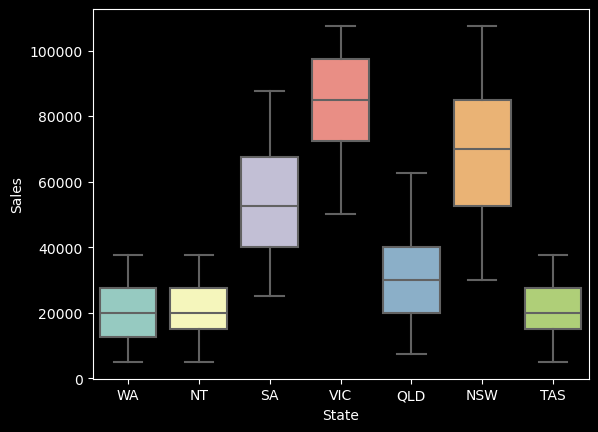

In [158]:
sns.boxplot(x='State', y='Sales', data=df)


In [136]:
fig = px.box(df,x='State', y='Sales')
fig.show()

In [160]:
aggs = df.groupby('State')['Sales'].agg(['min', 'max', 'mean', 'median'])
print(aggs)

         min     max          mean   median
State                                      
NSW    30000  107500  68468.276515  70000.0
NT      5000   37500  20907.407407  20000.0
QLD     7500   62500  30942.129630  30000.0
SA     25000   87500  54497.685185  52500.0
TAS     5000   37500  21074.074074  20000.0
VIC    50000  107500  83387.096774  85000.0
WA      5000   37500  20511.574074  20000.0


In [173]:
# - State-wise Sales Analysis for Different Demographic Groups (Kids, Women, Men, and Seniors).
# state_group_df = df.groupby(['State', 'Group']).Sales.sum().apply(lambda x: locale.currency(x,grouping=True)).reset_index()
pivot_df = orig_df.pivot_table(index=['State'], columns='Group', values='Sales', aggfunc=['sum']).reset_index()
pivot_df
# pivot_df = orig_df.pivot(index='State', columns='Group', values='Sales')

# # plt.plot(pivot_df['sum'])
# pivot_df


State       sum                              
Group            Kids       Men   Seniors     Women
0       NSW  18032500  18580000  17297500  18392500
1        NT   5700000   5762500   5465000   5652500
2       QLD   8510000   8392500   8190000   8325000
3        SA  14515000  14655000  14717500  14970000
4       TAS   5775000   5757500   5650000   5577500
5       VIC  15202500  15520000  15320000  15997500
6        WA   5625000   5752500   5512500   5262500

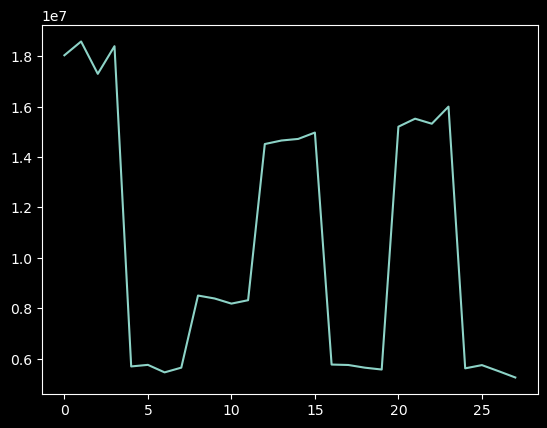

In [161]:
df_sales_by_state = df.groupby(['State', 'Group']).Sales.sum().reset_index()
df_sales_by_state
plt.plot(df_sales_by_state['Sales'])

In [120]:
# Create a pivot table
# pivot_df = orig_df.pivot_table(index=['State', 'Group'], values='Sales', aggfunc=['sum'])
pivot_table = pd.pivot_table(df, values='Sales', index='State', columns='Group', aggfunc='sum')
pivot_table

Group,Kids,Men,Seniors,Women
State,,,,
NSW,18032500,18580000,17297500,18392500
NT,5700000,5762500,5465000,5652500
QLD,8510000,8392500,8190000,8325000
SA,14515000,14655000,14717500,14970000
TAS,5775000,5757500,5650000,5577500
VIC,15202500,15520000,15320000,15997500
WA,5625000,5752500,5512500,5262500


In [121]:

pivot_df.plot(kind='bar')



NameError: name 'pivot_df' is not defined

In [ ]:
# - Group-wise Sales Analysis (Kids, Women, Men, and Seniors) Across Various States.
df.pivot_table(index=['Group', 'State'], values='Sales', aggfunc=['sum', 'mean'])
pivot_table2 = pd.pivot_table(df, values='Sales', index='Group', columns='State', aggfunc='sum')
pivot_table2

In [ ]:


# original_cols = list(df.columns)[:6]
# # data1 = df.filter(original_cols, axis=1).copy()
# # data1.set_index('Date')
# # data1.sort_index(inplace=True)
# # data1 = df.loc[:, df.columns.drop(['YearMonth',	'YearWeek',	'YearQuarter'])]
# # data1.set_index('Group', inplace=True)
# # data1.sort_index(inplace=True)
# data1.tail(n=10)

# # plt.plot(data1['Sales'])
# # data1.pivot_table(index=['Group'])
# data2= pd.pivot_table(df, index=["State"], values='Sales', aggfunc='sum')
# plt.plot(data2['Sales'])

# data1.head(n=10)
pivot_df.reset_index()

# df.pivot_table(index=['State', 'Group'], columns=['Sales'], aggfunc=['sum'])

# p_table = pd.pivot_table(df, index=['State', 'State']) 
df['Date']

pt1= pd.pivot_table(orig_df, index=['State','Group'], values='Sales').reset_index()
plt.plot(pt1['Sales'])

In [ ]:
pt1

In [ ]:
data = pd.read_csv("AusApparalSales4thQrt2020.csv", parse_dates=['Date'], index_col=['Date'])

data.sort_index(inplace=True)
data.tail(n=10)



plt.plot(data['Sales'])